In [83]:
import pandas as pd
import csv 
import datetime as dt
import matplotlib.pyplot as plt

order_file = "all_waybill_info_meituan.csv"
order_df = pd.read_csv(order_file)
order_df[['dt']] = order_df[['dt']].astype(str) 
order_df['dt'] =  pd.to_datetime(order_df['dt'])

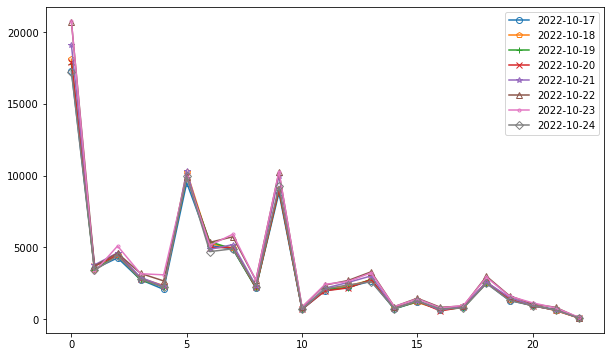

In [54]:
groups = ['dt', 'da_id']
order_group = order_df.groupby(by=groups)
order_count_by_dt = order_group['order_id'].count()
order_count_by_dt = order_count_by_dt.to_frame(name='count')

markers = (m for m in ['o', 'p', '+', 'x', '*', '^', '.', 'D']) 

fig = plt.figure()
fig.set_size_inches(10, 6)
for d, grp in order_count_by_dt.groupby('dt'):
    grp = grp.reset_index(drop=False)
    # if label.date() == dt.date.fromisoformat('2022-10-17'):
    plt.plot(grp['da_id'], grp['count'], marker=next(markers),   markerfacecolor='none', label=d.date())
    # grp['count'].plot(style='--o',xticks=grp['da_id'],label=d.date())

plt.legend()
plt.show()

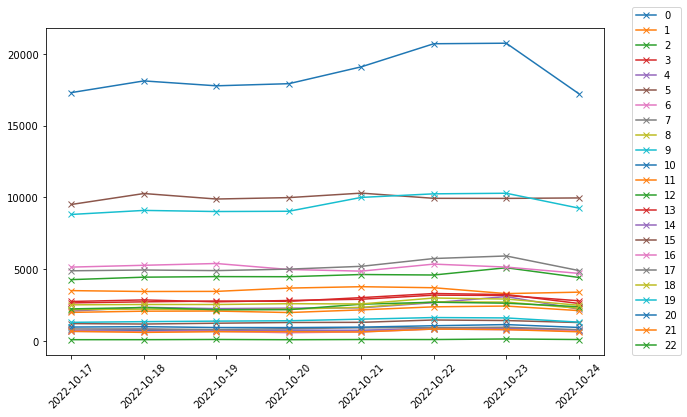

In [55]:
groups = ['da_id', 'dt']
order_group = order_df.groupby(by=groups)
order_count_by_da = order_group['order_id'].count()
order_count_by_da = order_count_by_da.to_frame(name='count')

fig = plt.figure()
fig.set_size_inches(10, 6)
for d, grp in order_count_by_da.groupby('da_id'):
    grp = grp.reset_index(drop=False)
    plt.plot(grp['dt'], grp['count'], marker='x',  markerfacecolor='none', label=d)
    # grp['count'].plot(style='--o',xticks=grp['da_id'],label=d.date())

plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 0), loc=3, borderaxespad=0)
plt.show()

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


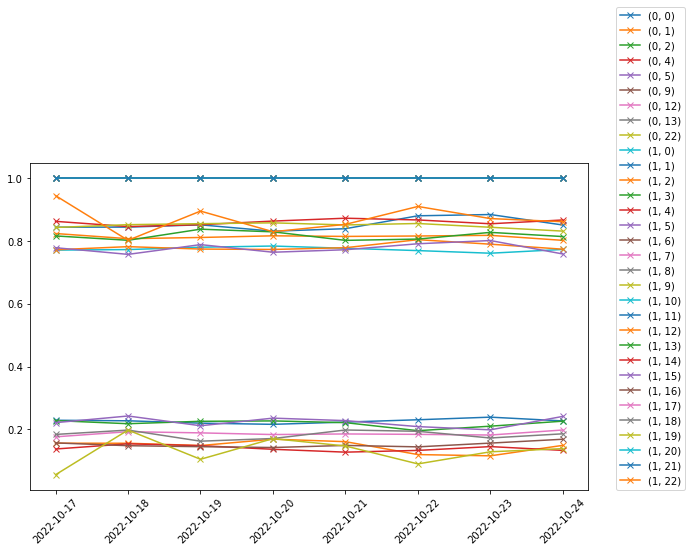

In [110]:
groups = ['da_id', 'dt', 'is_courier_grabbed']
order_group = order_df.groupby(by=groups)
order_count_by_grab = order_group['order_id'].count()
order_count_by_grab = order_count_by_grab.to_frame(name='count')

fig = plt.figure()
fig.set_size_inches(10, 6)
new_df = pd.DataFrame()
for d, grp in order_count_by_grab.groupby(['da_id', 'dt']):
    grp = grp.reset_index(drop=False)
    grp['ratio'] = grp['count'] / grp['count'].sum()
    if new_df.empty:
        new_df = grp
    else:
        new_df = pd.concat([new_df, grp],ignore_index=True)

for d, grp in new_df.groupby(['is_courier_grabbed', 'da_id']):
    plt.plot(grp['dt'], grp['ratio'], marker='x',  markerfacecolor='none', label=d)
    
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 0), loc=3, borderaxespad=0)
plt.show()